In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
fuel = pd.read_csv('Fuel Efficiciency/Fuel_FO_2010-17_lr.csv', sep = ';',index_col=None,encoding='latin-1')
fuel.head(5)

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,id_Type,Type,Traccion,Direction,Id_Model_Loc,Model_Loc,UTC,GTK_T,Net_Ton_Km,Liters_r
0,TREN,32175,N,26/4/2017,5409,1,67.0,252.0,4.63,56.1,...,1,CARGA,S,0,38,GE U20C,UTR,35628557.1,56.1,100.0
1,TREN,32177,N,26/4/2017,11,1,104.0,285.0,2.25,35.1,...,1,CARGA,S,1,9,GE U10B,UTR,21194784.0,14995773.0,100.0
2,TREN,32178,N,26/4/2017,5409,1,67.0,252.0,3.08,56.1,...,1,CARGA,S,1,38,GE U20C,UTR,83729250.0,58905000.0,200.0
3,TREN,32187,N,27/4/2017,6931,1,18.0,286.0,1.75,35.1,...,1,CARGA,S,1,43,HM,UTR,20671794.0,14546844.0,50.0
4,TREN,32188,N,27/4/2017,21,1,72.0,91.0,3.33,56.1,...,1,CARGA,S,0,28,GM,UTR,27692100.0,0.0,100.0


In [3]:
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
#f = f[(f.Sector == 'E') & (f.Sub_Type == 'CARGA GENERAL') & (f.Model_Loc == 'GE U20C') & (f.Liters >40) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Direction == 0.0) & (f.Traccion == 'S') & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 13000)]

f = f[(f.Sector == 'E') & (f.Liters >40) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Traccion == 'S') & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 13000)]

f.groupby(['UTC','Sub_Type','Model_Loc','Track_id']).size()

UTC  Sub_Type               Model_Loc  Track_id
UTR  CARGA GENERAL          GE C23EMP  2            797
                                       3            757
                                       4            890
                            GE U10B    2            228
                                       3            719
                                       4            157
                            GE U20C    2           3993
                                       3           3757
                                       4           3838
                            GM         2            604
                                       3            880
                                       4            496
     DERIVADOS DE PETROLEO  GE C23EMP  2            249
                                       3            251
                                       4            236
                            GE U10B    2             67
                                       3             83


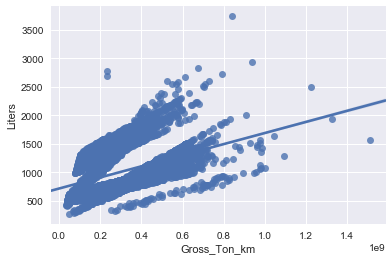

In [4]:
sns.regplot(y="Liters", x="Gross_Ton_km", data=f, fit_reg = True)

In [5]:
f= fuel
# create six dummy variables for track_id using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Track_id, prefix='SD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create six dummy variables for Locomotive Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Model_Loc, prefix='MOD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)


# create six dummy variables for Train Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Sub_Type, prefix='TRN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create a new Series called Tract - Number of Locomotives
f['Tract'] = f.Traccion.map({'S':1,'M':0})

# create a new Series called IsUnit
f['IsUnit'] = f.UTC.map({'UTR':1,'NUT':0,'PAS':-1})

f.head()

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,TRN_3,TRN_4,TRN_5,TRN_6,TRN_8,TRN_9,TRN_10,TRN_11,Tract,IsUnit
0,TREN,32175,N,26/4/2017,5409,1,67.0,252.0,4.63,56.1,...,0,0,0,0,0,0,0,0,1,1
1,TREN,32177,N,26/4/2017,11,1,104.0,285.0,2.25,35.1,...,0,0,0,0,0,0,0,0,1,1
2,TREN,32178,N,26/4/2017,5409,1,67.0,252.0,3.08,56.1,...,0,0,0,0,0,0,0,0,1,1
3,TREN,32187,N,27/4/2017,6931,1,18.0,286.0,1.75,35.1,...,0,0,0,0,0,0,0,0,1,1
4,TREN,32188,N,27/4/2017,21,1,72.0,91.0,3.33,56.1,...,0,0,0,0,0,0,0,0,1,1


In [6]:
f.dtypes

IN                 object
Train_Bulletin      int64
Sector             object
DateTime1          object
Id_Loc              int64
Track_id            int64
Id_Engineer       float64
Id_fireman        float64
Hours             float64
Kilometers        float64
Liters              int64
Net_Ton_Km_r      float64
Gross_Ton_km      float64
Net_Tons            int64
Gross_Tons          int64
Date               object
Locomotive          int64
Track              object
Maquinista         object
Auxiliar           object
Train_nbr          object
Id_Sub_Type         int64
Sub_Type           object
id_Type             int64
Type               object
Traccion           object
Direction           int64
Id_Model_Loc        int64
Model_Loc          object
UTC                object
GTK_T             float64
Net_Ton_Km        float64
Liters_r          float64
Lts_x_GTK         float64
SD_2                uint8
SD_3                uint8
SD_4                uint8
SD_5                uint8
SD_6        

In [7]:
#f = f[(f.Sector == 'E') & (f.Sub_Type == 'CARGA GENERAL') & (f.Model_Loc == 'GE U20C') & (f.Liters >40) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Direction == 0.0) & (f.Traccion == 'S') & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 13000)]


In [8]:
# Import regression modules
# ols - stands for Ordinary least squares
import statsmodels.api as sm
from statsmodels.formula.api import ols
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('Liters ~ Gross_Ton_km + Hours + Kilometers + IsUnit + SD_2 + SD_3 + SD_4 + SD_5 + SD_6 + MOD_10 + MOD_28 + MOD_38 + MOD_40 + MOD_42 + MOD_43 + TRN_2 + TRN_3 + TRN_4 + TRN_5 + TRN_6 + TRN_8 + TRN_9 + TRN_10 + TRN_11 ',f).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     7152.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:27:42   Log-Likelihood:            -6.3418e+05
No. Observations:               89979   AIC:                         1.268e+06
Df Residuals:                   89955   BIC:                         1.269e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      -65.8977     12.606     -5.227   

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [10]:
from sklearn.linear_model import LinearRegression
feature_cols = ['Gross_Ton_km', 'Hours', 'Kilometers', 'IsUnit','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11']
X = f[feature_cols]
y = f.Liters
# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('Gross_Ton_km', 1.6666960174313205e-06),
 ('Hours', 10.71161874303988),
 ('Kilometers', 0.671037586274565),
 ('IsUnit', 111.42670678182139),
 ('SD_2', 21.947167835215453),
 ('SD_3', 298.69676210073408),
 ('SD_4', 111.62967274409147),
 ('SD_5', -56.731162542882345),
 ('SD_6', 60.90358027958866),
 ('MOD_10', 124.05825166812392),
 ('MOD_28', -4.4560783709637946),
 ('MOD_38', 195.9940360025295),
 ('MOD_40', -25.158963326414437),
 ('MOD_42', -96.276827720029019),
 ('MOD_43', -29.069339901770146),
 ('TRN_2', -8.7735920025344676),
 ('TRN_3', -102.32374642441184),
 ('TRN_4', 233.65777904119443),
 ('TRN_5', 65.605100917893452),
 ('TRN_6', 44.953525987645676),
 ('TRN_8', 99.875041058493991),
 ('TRN_9', 123.18771567168008),
 ('TRN_10', 77.262336862674701),
 ('TRN_11', 222.27361154766118)]

In [11]:
def processSubset(feature_set):
    
# Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [12]:
#def getBest(k):
#    tic = time.time()
#    results = []
#    for combo in itertools.combinations(X.columns, k):
#        results.append(processSubset(combo))
    # Wrap everything up in a nice dataframe
#    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
#    best_model = models.loc[models['RSS'].argmin()]
#    toc = time.time()
#    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    # Return the best model, along with some other useful information about the model
#    return best_model


In [13]:
# Could take quite awhile to complete...
#models = pd.DataFrame(columns=["RSS", "model"])
#tic = time.time()
#for i in range(1,8):
#    models.loc[i] = getBest(i)
#toc = time.time()
#print("Total elapsed time:", (toc-tic), "seconds.")

In [14]:
def forward(predictors):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
          # Return the best model, along with some other useful information about the model
    return best_model

In [15]:
models2 = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
predictors = []
for i in range(1,len(X.columns)+1):
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  24 models on 1 predictors in 0.24565362930297852 seconds.
Processed  23 models on 2 predictors in 0.35895538330078125 seconds.
Processed  22 models on 3 predictors in 0.4411740303039551 seconds.
Processed  21 models on 4 predictors in 0.49131035804748535 seconds.
Processed  20 models on 5 predictors in 0.5905702114105225 seconds.
Processed  19 models on 6 predictors in 0.6798081398010254 seconds.
Processed  18 models on 7 predictors in 0.7449829578399658 seconds.
Processed  17 models on 8 predictors in 0.8382284641265869 seconds.
Processed  16 models on 9 predictors in 0.9254639148712158 seconds.
Processed  15 models on 10 predictors in 1.0096862316131592 seconds.
Processed  14 models on 11 predictors in 1.1811425685882568 seconds.
Processed  13 models on 12 predictors in 1.01670241355896 seconds.
Processed  12 models on 13 predictors in 1.0457825660705566 seconds.
Processed  11 models on 14 predictors in 1.0688447952270508 seconds.
Processed  10 models on 15 predictors in 1

In [16]:
print(models2.loc[1, "model"].summary())
print(models2.loc[2, "model"].summary())


                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 2.237e+05
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:28:02   Log-Likelihood:            -6.6983e+05
No. Observations:               89979   AIC:                         1.340e+06
Df Residuals:                   89978   BIC:                         1.340e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Gross_Ton_km  3.639e-06   7.69e-09    472.981   

In [17]:
print(models2.loc[3, "model"].summary())
print(models2.loc[4, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.589e+05
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:28:02   Log-Likelihood:            -6.4322e+05
No. Observations:               89979   AIC:                         1.286e+06
Df Residuals:                   89976   BIC:                         1.286e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Gross_Ton_km  2.134e-06   8.47e-09    251.933   

In [18]:
print(models2.loc[5, "model"].summary())
print(models2.loc[6, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.068e+05
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:28:02   Log-Likelihood:            -6.3887e+05
No. Observations:               89979   AIC:                         1.278e+06
Df Residuals:                   89974   BIC:                         1.278e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Gross_Ton_km  1.895e-06   8.72e-09    217.218   

In [19]:
print(models2.loc[7, "model"].summary())
print(models2.loc[8, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 8.037e+04
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:28:02   Log-Likelihood:            -6.3687e+05
No. Observations:               89979   AIC:                         1.274e+06
Df Residuals:                   89972   BIC:                         1.274e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Gross_Ton_km  1.781e-06   8.74e-09    203.863   

In [20]:
print(models2.loc[9, "model"].summary())
print(models2.loc[10, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 6.509e+04
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:28:02   Log-Likelihood:            -6.3530e+05
No. Observations:               89979   AIC:                         1.271e+06
Df Residuals:                   89970   BIC:                         1.271e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Gross_Ton_km  1.811e-06   8.64e-09    209.534   

In [21]:
print(models2.loc[11, "model"].summary())
print(models2.loc[12, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 5.406e+04
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:28:02   Log-Likelihood:            -6.3471e+05
No. Observations:               89979   AIC:                         1.269e+06
Df Residuals:                   89968   BIC:                         1.270e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Gross_Ton_km  1.713e-06      1e-08    170.944   

In [22]:
def backward(predictors):
    tic = time.time()
    results = []
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.") 
    # Return the best model, along with some other useful information about the model
    return best_model

In [23]:
models3 = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))
tic = time.time()
predictors = X.columns
while(len(predictors) > 1):
    models3.loc[len(predictors)-1] = backward(predictors)
    predictors = models3.loc[len(predictors)-1]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  24 models on 23 predictors in 4.235255718231201 seconds.
Processed  23 models on 22 predictors in 3.813190460205078 seconds.
Processed  22 models on 21 predictors in 3.4832370281219482 seconds.
Processed  21 models on 20 predictors in 3.151431083679199 seconds.
Processed  20 models on 19 predictors in 2.8766520023345947 seconds.
Processed  19 models on 18 predictors in 2.5618343353271484 seconds.
Processed  18 models on 17 predictors in 2.290070056915283 seconds.
Processed  17 models on 16 predictors in 1.9752540588378906 seconds.
Processed  16 models on 15 predictors in 1.7096002101898193 seconds.
Processed  15 models on 14 predictors in 1.6082868576049805 seconds.
Processed  14 models on 13 predictors in 1.2443442344665527 seconds.
Processed  13 models on 12 predictors in 1.10493803024292 seconds.
Processed  12 models on 11 predictors in 0.8984024524688721 seconds.
Processed  11 models on 10 predictors in 0.7188990116119385 seconds.
Processed  10 models on 9 predictors in 

In [24]:
print(models2.loc[11, "model"].summary())
print(models3.loc[11, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 5.406e+04
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:28:36   Log-Likelihood:            -6.3471e+05
No. Observations:               89979   AIC:                         1.269e+06
Df Residuals:                   89968   BIC:                         1.270e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Gross_Ton_km  1.713e-06      1e-08    170.944   

In [25]:
print(models2.loc[13, "model"].summary())
print(models3.loc[13, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 4.593e+04
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        20:28:36   Log-Likelihood:            -6.3455e+05
No. Observations:               89979   AIC:                         1.269e+06
Df Residuals:                   89966   BIC:                         1.269e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Gross_Ton_km  1.714e-06      1e-08    171.049   

In [26]:
coef_cols = ['Gross_Ton_km', 'Hours', 'Kilometers', 'IsUnit','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11', 'Liters']
coef= f[coef_cols]

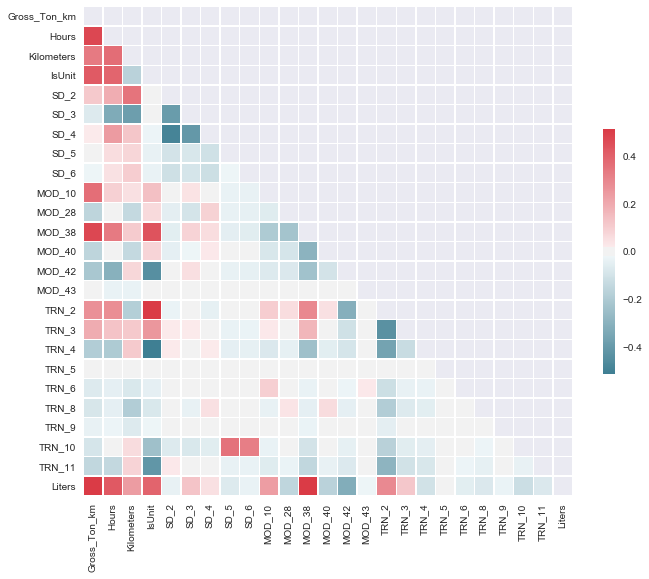

In [27]:
# Compute the correlation matrix
corr = coef.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f_, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f['GTK_9'] = ((f['Gross_Ton_km'] / 1000000000)).astype(float)
#f = f[(f.Sector == 'E') & (f.Liters >40) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Traccion == 'S') & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 13000)]


In [39]:
# create six dummy variables for track_id using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Track_id, prefix='SD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create six dummy variables for Locomotive Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Model_Loc, prefix='MOD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)


# create six dummy variables for Train Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Sub_Type, prefix='TRN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create a new Series called Tract - Number of Locomotives
f['Tract'] = f.Traccion.map({'S':1,'M':0})

# create a new Series called IsUnit
f['IsUnit'] = f.UTC.map({'UTR':1,'NUT':0,'PAS':-1})

In [40]:
# Import regression modules
# ols - stands for Ordinary least squares
import statsmodels.api as sm
from statsmodels.formula.api import ols
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('Liters ~ GTK_9 + Hours + Kilometers + IsUnit + SD_3 + SD_4 + MOD_10 + MOD_38 + MOD_42 + TRN_2 + TRN_3 + TRN_4 + TRN_11 ',f).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        22:59:50   Log-Likelihood:            -6.3435e+05
No. Observations:               89979   AIC:                         1.269e+06
Df Residuals:                   89965   BIC:                         1.269e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     22.5996      5.371      4.208      0.0

In [41]:
import sklearn
from sklearn.linear_model import LinearRegression
feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'SD_3', 'SD_4', 
                 'MOD_10', 'MOD_38', 'MOD_42', 'TRN_2', 'TRN_3', 'TRN_4', 'TRN_11']
X = f[feature_cols]
y = f.Liters
# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
list(zip(feature_cols, lm.coef_))

[('GTK_9', 1668.0591234527542),
 ('Hours', 11.001054156649866),
 ('Kilometers', 0.68824047342272365),
 ('IsUnit', 163.41717248792651),
 ('SD_3', 280.30728188126272),
 ('SD_4', 90.273690633215054),
 ('MOD_10', 131.02076667209738),
 ('MOD_38', 204.68863894876816),
 ('MOD_42', -122.31220453061205),
 ('TRN_2', -150.8706185153091),
 ('TRN_3', -243.6096092562301),
 ('TRN_4', 205.26073557957497),
 ('TRN_11', 192.8729071390855)]

In [42]:
# Separate a Training Set and a Test Set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(60285, 13)
(29694, 13)
(60285,)
(29694,)


In [43]:
# Fit a linear regression model to the training set

feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'SD_3', 'SD_4', 
                 'MOD_10', 'MOD_38', 'MOD_42', 'TRN_2', 'TRN_3', 'TRN_4', 'TRN_11']

X = X_train[feature_cols]
y = Y_train
# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
pd.DataFrame(list(zip(feature_cols, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,GTK_9,1650.904978
1,Hours,10.977079
2,Kilometers,0.692038
3,IsUnit,159.688922
4,SD_3,282.635204
5,SD_4,89.991665
6,MOD_10,140.372592
7,MOD_38,207.679065
8,MOD_42,-120.243837
9,TRN_2,-139.898349


In [44]:
from sklearn.model_selection import cross_val_score
# Implement cross_validation with k-fold in the training data
scores = cross_val_score(lm, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)

print(scores)

# Show mean square estimates
print("Mean Squared: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-75221.0854603  -78282.93910751 -76481.04725251 -76911.2743415
 -79146.02405282]
Mean Squared: -77208.47 (+/- 2753.29)


In [45]:
# Implement cross_validation with k-fold with the test data
scores = cross_val_score(lm, X_test, Y_test, scoring='neg_mean_squared_error', cv=5)

print(scores)

# Show mean square estimates
print("Mean Squared: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-82688.20440222 -77426.06770329 -77712.78757213 -80463.7430693
 -77438.11235536]
Mean Squared: -79145.78 (+/- 4215.48)


In [48]:
# TRAIN
mseCRIMRMPTRATIO_TRAIN = np.sum((Y_train - lm.predict(X_train[feature_cols])) ** 2)
#print ("Mean Squared Train: %0.2f " % mseCRIMRMPTRATIO_TRAIN/len(Y_train))

# TEST
mseCRIMRMPTRATIO_TEST = np.sum((Y_test - lm.predict(X_test[feature_cols])) ** 2)
#print ("Mean Squared Test: %0.2f " % mseCRIMRMPTRATIO_TEST/len(Y_test))

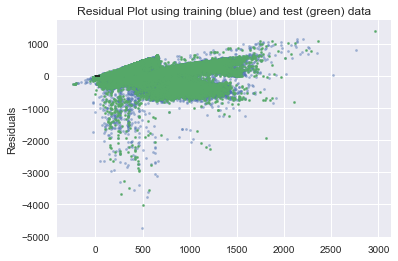

In [54]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=5, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=5)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

In [59]:
# How strong is the relationship
# From the RSE 
#mse = np.mean((f.Liters - lm.predict(X_test[feature_cols])) ** 2)
#RSE = ((mse/(len(f)-2)) ** 0.5)

#print("Mean Squared: %0.2f" % mse)

#print("Residual Standard Eror: %0.2f" % RSE)

# show the R-squared
print("R Sqared: %0.4f" % lm.score(X_train, Y_train))

R Sqared: 0.6467


In [50]:
# Implement cross_validation with k-fold with the test data
scores = cross_val_score(lm, X_test, Y_test, scoring='neg_mean_squared_error', cv=5)

print(scores)

# Show mean square estimates
print("Mean Squared Test: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-82688.20440222 -77426.06770329 -77712.78757213 -80463.7430693
 -77438.11235536]
Mean Squared Test: -79145.78 (+/- 4215.48)


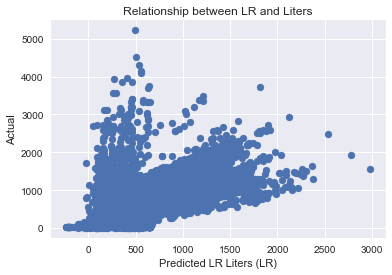

In [51]:
# Is the relationship linear
plt.scatter(m.fittedvalues, f.Liters)
plt.xlabel("Predicted LR Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between LR and Liters")

In [57]:
# https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = range(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in range(X[variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[variables]

Automatically created module for IPython interactive environment


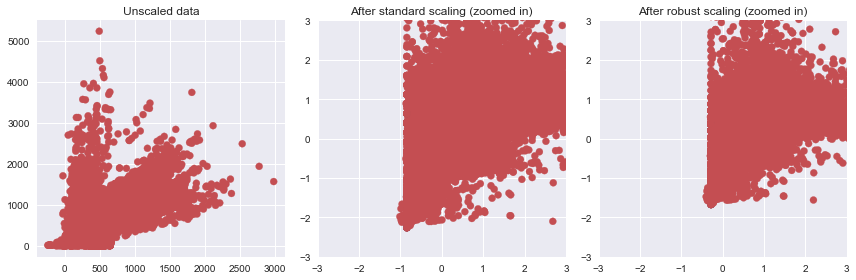

Testset accuracy using standard scaler: 0.132
Testset accuracy using robust scaler:   0.132


In [60]:
from __future__ import print_function
print(__doc__)


# Code source: Thomas Unterthiner
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler

# Scale data
standard_scaler = StandardScaler()
Xtr_s = standard_scaler.fit_transform(X_train)
Xte_s = standard_scaler.transform(X_test)

robust_scaler = RobustScaler()
Xtr_r = robust_scaler.fit_transform(X_train)
Xte_r = robust_scaler.transform(X_test)


# Plot data
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(m.fittedvalues, f.Liters,
              color=np.where(Y_train > 0, 'r', 'b'))
ax[1].scatter(Xtr_s[:, 0], Xtr_s[:, 1], color=np.where(Y_train > 0, 'r', 'b'))
ax[2].scatter(Xtr_r[:, 0], Xtr_r[:, 1], color=np.where(Y_train > 0, 'r', 'b'))
ax[0].set_title("Unscaled data")
ax[1].set_title("After standard scaling (zoomed in)")
ax[2].set_title("After robust scaling (zoomed in)")
# for the scaled data, we zoom in to the data center (outlier can't be seen!)
for a in ax[1:]:
    a.set_xlim(-3, 3)
    a.set_ylim(-3, 3)
plt.tight_layout()
plt.show()


# Classify using k-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtr_s, Y_train)
acc_s = knn.score(Xte_s, Y_test)
print("Testset accuracy using standard scaler: %.3f" % acc_s)
knn.fit(Xtr_r, Y_train)
acc_r = knn.score(Xte_r, Y_test)
print("Testset accuracy using robust scaler:   %.3f" % acc_r)